<h1>Predicting if Teams finish in the top or bottom half of the table with KNN classification, k=2</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('soccer-standings.csv', index_col=0)
print(df)

                        Rank   P   M   W   D   L   G  GA  GD  Rank.1  ...  \
Team                                                                  ...   
Liverpool                  1  84  38  25   9   4  86  41  45       1  ...   
Arsenal                    2  74  38  20  14   4  69  34  35       5  ...   
Manchester City            3  71  38  21   8   9  72  44  28       2  ...   
Chelsea                    4  69  38  20   9   9  64  43  21       3  ...   
Newcastle United           5  66  38  20   6  12  68  47  21       6  ...   
Aston Villa                6  66  38  19   9  10  58  51   7       4  ...   
Nottingham Forest          7  65  38  19   8  11  58  46  12       7  ...   
Brighton & Hove Albion     8  61  38  16  13   9  66  59   7       8  ...   
AFC Bournemouth            9  56  38  15  11  12  58  46  12      10  ...   
Brentford                 10  56  38  16   8  14  66  57   9       9  ...   
Fulham                    11  54  38  15   9  14  54  54   0      11  ...   

In [3]:
df=df[['W', 'L']]
print(df)

                         W   L
Team                          
Liverpool               25   4
Arsenal                 20   4
Manchester City         21   9
Chelsea                 20   9
Newcastle United        20  12
Aston Villa             19  10
Nottingham Forest       19  11
Brighton & Hove Albion  16   9
AFC Bournemouth         15  12
Brentford               16  14
Fulham                  15  14
Crystal Palace          13  11
Everton                 11  12
West Ham United         11  17
Manchester United       11  18
Wolverhampton           12  20
Tottenham Hotspur       11  22
Leicester City           6  25
Ipswich Town             4  24
Southampton              2  30


In [4]:
def relegate(x):
    if x>15:
        return 1
    else:
        return -1

df['Relegated']=df['W'].apply(relegate)
print(df)
    

                         W   L  Relegated
Team                                     
Liverpool               25   4          1
Arsenal                 20   4          1
Manchester City         21   9          1
Chelsea                 20   9          1
Newcastle United        20  12          1
Aston Villa             19  10          1
Nottingham Forest       19  11          1
Brighton & Hove Albion  16   9          1
AFC Bournemouth         15  12         -1
Brentford               16  14          1
Fulham                  15  14         -1
Crystal Palace          13  11         -1
Everton                 11  12         -1
West Ham United         11  17         -1
Manchester United       11  18         -1
Wolverhampton           12  20         -1
Tottenham Hotspur       11  22         -1
Leicester City           6  25         -1
Ipswich Town             4  24         -1
Southampton              2  30         -1


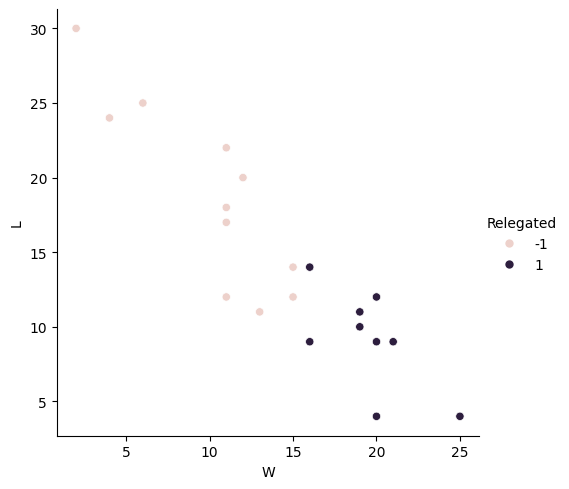

In [5]:
sns.relplot(data=df, x='W', y='L', hue='Relegated')

In [6]:
from sklearn.model_selection import train_test_split
X = df[df.columns[:2]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

                    W   L
Team                     
AFC Bournemouth    15  12
West Ham United    11  17
Everton            11  12
Tottenham Hotspur  11  22
Chelsea            20   9
Nottingham Forest  19  11
Wolverhampton      12  20
Newcastle United   20  12
Manchester City    21   9
Liverpool          25   4
                         W   L
Team                          
Brighton & Hove Albion  16   9
Aston Villa             19  10
Fulham                  15  14
Manchester United       11  18
Leicester City           6  25
Arsenal                 20   4
Ipswich Town             4  24
Crystal Palace          13  11
Southampton              2  30
Brentford               16  14
Team
AFC Bournemouth     -1
West Ham United     -1
Everton             -1
Tottenham Hotspur   -1
Chelsea              1
Nottingham Forest    1
Wolverhampton       -1
Newcastle United     1
Manchester City      1
Liverpool            1
Name: Relegated, dtype: int64
Team
Brighton & Hove Albion    1
Aston Villa       

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print(X_test)

[[-0.30844355 -0.15523011]
 [-1.13095967  0.81495805]
 [-1.13095967 -0.15523011]
 [-1.13095967  1.78514621]
 [ 0.71970161 -0.737343  ]
 [ 0.51407258 -0.34926774]
 [-0.92533064  1.39707095]
 [ 0.71970161 -0.15523011]
 [ 0.92533064 -0.737343  ]
 [ 1.74784676 -1.70753116]]
[[-0.10281452 -0.737343  ]
 [ 0.51407258 -0.54330537]
 [-0.30844355  0.23284516]
 [-1.13095967  1.00899568]
 [-2.15910482  2.3672591 ]
 [ 0.71970161 -1.70753116]
 [-2.57036288  2.17322147]
 [-0.71970161 -0.34926774]
 [-2.98162094  3.33744726]
 [-0.10281452  0.23284516]]


In [8]:
k=2
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
print(y_test)
print(y_pred)

Team
Brighton & Hove Albion    1
Aston Villa               1
Fulham                   -1
Manchester United        -1
Leicester City           -1
Arsenal                   1
Ipswich Town             -1
Crystal Palace           -1
Southampton              -1
Brentford                 1
Name: Relegated, dtype: int64
[-1  1 -1 -1 -1  1 -1 -1 -1 -1]


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[6 0]
 [2 2]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.75      1.00      0.86         6
           1       1.00      0.50      0.67         4

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg       0.85      0.80      0.78        10

Accuracy: 0.8
